Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Carregamento de dados

In [35]:

dataset = pd.read_excel('Global_Superstore2.xlsx', index_col=0, comment='#') 

# Exploração dos dados

In [3]:
dataset.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
Row ID,,,,,,,,,,,,,,,,,,,,,
32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7.0,0.0,762.1845,933.57,Critical
26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9.0,0.1,-288.7650,923.63,Critical
25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9.0,0.1,919.9710,915.49,Medium


In [4]:
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,9994.000000,51200.000000,51200.000000,51200.000000,51200.000000,51200.000000
mean,55190.379428,246.865006,3.476426,0.143026,28.639338,26.416522
std,32063.693350,487.908698,2.278923,0.212409,174.491125,57.338685
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,23223.000000,30.880000,2.000000,0.000000,0.000000,2.620000
50%,56430.500000,85.273800,3.000000,0.000000,9.255100,7.810000
75%,90008.000000,251.640000,5.000000,0.200000,36.841500,24.530000
max,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 32298 to 6147
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        51290 non-null  object 
 1   Order Date      51290 non-null  object 
 2   Ship Date       51290 non-null  object 
 3   Ship Mode       51290 non-null  object 
 4   Customer ID     51290 non-null  object 
 5   Customer Name   51290 non-null  object 
 6   Segment         51290 non-null  object 
 7   City            51290 non-null  object 
 8   State           51290 non-null  object 
 9   Country         51290 non-null  object 
 10  Postal Code     9994 non-null   float64
 11  Market          51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Product ID      51290 non-null  object 
 14  Category        51290 non-null  object 
 15  Sub-Category    51290 non-null  object 
 16  Product Name    51251 non-null  object 
 17  Sales           51200 non-nu

In [6]:
dataset.nunique() # count number od distinct elements in specified axis. Can ignore NaN values

Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         631
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3781
Sales             22967
Quantity             14
Discount             27
Profit            24523
Shipping Cost     10037
Order Priority        4
dtype: int64

In [7]:
columns = dataset.columns
for i in columns:
    if not ( len(dataset[i].unique()) == len(dataset) ) :  # se o número de order id,.... unicos não é igual ao número de rows do dataset, então há repetidos
        print(i)

Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
City
State
Country
Postal Code
Market
Region
Product ID
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit
Shipping Cost
Order Priority


# Tratamento de dados

In [8]:
dataset.drop(columns=['Order ID', 'Customer ID', 'Customer Name', 'Product ID', 'Product Name', 'Postal Code'])

,Order Date,Ship Date,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
Row ID,,,,,,,,,,,,,,,,,
32298,31-07-2012,31-07-2012,Same Day,Consumer,New York City,New York,United States,US,East,Technology,Accessories,2309.650,7.0,0.0,762.1845,933.57,Critical
26341,05-02-2013,07-02-2013,Second Class,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,Furniture,Chairs,3709.395,9.0,0.1,-288.7650,923.63,Critical
25330,17-10-2013,18-10-2013,First Class,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,Technology,Phones,5175.171,9.0,0.1,919.9710,915.49,Medium
13524,28-01-2013,30-01-2013,First Class,Home Office,Berlin,Berlin,Germany,EU,Central,Technology,Phones,2892.510,5.0,0.1,-96.5400,910.16,Medium
47221,05-11-2013,06-11-2013,Same Day,Consumer,Dakar,Dakar,Senegal,Africa,Africa,Technology,Copiers,2832.960,8.0,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29002,19-06-2014,19-06-2014,Same Day,Corporate,Kure,Hiroshima,Japan,APAC,North Asia,Office Supplies,Fasteners,65.100,5.0,0.0,4.5000,0.01,Medium
35398,20-06-2014,24-06-2014,Standard Class,Consumer,Houston,Texas,United States,US,Central,Office Supplies,Appliances,0.444,1.0,0.8,-1.1100,0.01,Medium
40470,02-12-2013,02-12-2013,Same Day,Home Office,Oxnard,California,United States,US,West,Office Supplies,Envelopes,NaN,NaN,NaN,NaN,NaN,None


<AxesSubplot:>

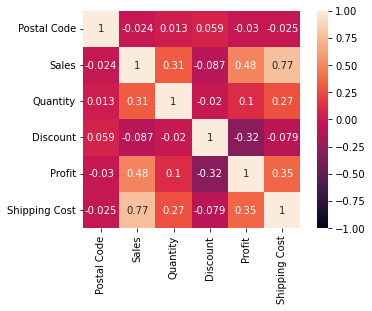

In [9]:
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True,annot=True)

In [10]:
dataset = dataset.drop(['Sales'], axis=1)

In [11]:
dataset['Ship Mode'] = dataset['Ship Mode'].astype('category')
dataset['Segment'] = dataset['Segment'].astype('category')
dataset['Country'] = dataset['Country'].astype('category')
dataset['Market'] = dataset['Market'].astype('category')
dataset['Region'] = dataset['Region'].astype('category')
dataset['Category'] = dataset['Category'].astype('category')
dataset['Sub-Category'] = dataset['Sub-Category'].astype('category')
dataset['Order Priority'] = dataset['Order Priority'].astype('category')

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 32298 to 6147
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Order ID        51290 non-null  object  
 1   Order Date      51290 non-null  object  
 2   Ship Date       51290 non-null  object  
 3   Ship Mode       51290 non-null  category
 4   Customer ID     51290 non-null  object  
 5   Customer Name   51290 non-null  object  
 6   Segment         51290 non-null  category
 7   City            51290 non-null  object  
 8   State           51290 non-null  object  
 9   Country         51290 non-null  category
 10  Postal Code     9994 non-null   float64 
 11  Market          51290 non-null  category
 12  Region          51290 non-null  category
 13  Product ID      51290 non-null  object  
 14  Category        51290 non-null  category
 15  Sub-Category    51290 non-null  category
 16  Product Name    51251 non-null  object  
 17  Quantity 

# Modelação


In [13]:
from pandas import DatetimeIndex

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


### O target são as sales. Depois melhoro o texto :)

In [14]:
#dataset = dataset.drop(columns=['Order ID', 'Customer ID', 'Customer Name', 'Product ID', 'Product Name', 'Postal Code'])

In [15]:
#dataset.reset_index(drop=True)
#dataset1 = pd.read_excel('Global_Superstore2.xlsx', index_col=0, comment='#') 
dataset = dataset.drop(columns=['Quantity', 'Discount', 'Shipping Cost', 'Sales'])
#print(dataset)

y = dataset['Profit']
print(dataset.info())
X = dataset.drop(['Profit', 'Order ID', 'Customer Name', 'Product Name','Postal Code', 'Region', 'City' ], axis=1)

#print(X)

NameError: name 'dataset1' is not defined

In [31]:
# Acho que se pode remover este bloco, está igual lá para baixo
if "Order Date" in X:
    consider_year = True
    consider_month = True
    consider_day = True
else: 
    consider_year = False
    consider_month = False
    consider_day = False
    
# Converter datas 
dates_order = DatetimeIndex(pd.to_datetime(X['Order Date'],format='%d-%m-%Y', errors='coerce'))
dates_ship = DatetimeIndex(pd.to_datetime(X['Ship Date'],format='%d-%m-%Y', errors='coerce'))
if consider_year : 
    X['Year_order'] = dates_order.year
    X['Year_ship'] = dates_ship.year
    
if consider_month : 
    X['Month_order'] = dates_order.month
    X['Month_ship'] = dates_ship.month

if consider_day : 
    X['Day_order'] = dates_order.day
    X['Day_ship'] = dates_ship.day
if 'Order Date' in X:
    X = X.drop(['Order Date', 'Ship Date'], axis=1)
#print(X)
# Convert ID's to Label encoding
from sklearn.preprocessing import LabelEncoder

if "Category" in X:
    process_Product_ID = True
    process_Costumer_ID = True
    process_Category = True
    process_Sub_Category = True
else: 
    process_Product_ID = False
    process_Costumer_ID = False
    process_Category = False
    process_Sub_Category = False

lb_make = LabelEncoder()

if process_Product_ID:
    X["Product ID LabelEnc"] = lb_make.fit_transform(X["Product ID"])

if process_Costumer_ID:
    X["Costumer ID LabelEnc"] = lb_make.fit_transform(X["Customer ID"])

if process_Category:
    X["Category LabelEnc"] = lb_make.fit_transform(X["Category"])

if process_Sub_Category:
    X["Sub-Category LabelEnc"] = lb_make.fit_transform(X["Sub-Category"])

if process_Product_ID: 
    X = X.drop(['Product ID', 'Customer ID', "Category", "Sub-Category"], axis=1)
#print(X)

NameError: name 'X' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

# Para testar, falta corrigir estas categorias:
if 'Order Priority' in X:
    X = X.drop(['Order Priority', 'Market', "Country", "State", "Segment", "Ship Mode"], axis=1)

# Tirar os NaN de y, substituindo pela média
mean_value= y.mean()
# Trocar infinitos por nan

X.replace([np.inf, -np.inf], np.nan, inplace=True)
#X.fillna(value=mean_value, inplace=True)
y.fillna(value=mean_value, inplace=True)




In [ ]:



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
clf = DecisionTreeClassifier(random_state=2021)


#X_train1 = X_train[X_train.isna().any(axis=1)]
"""

#Acho que podemos converter os mais importantes para one-hot enconding ou algo do género. Depois continuo
print("Será que há Na\n")
count = np.isnan(X_train).values.sum()
count = np.isnan(X_train).any()
print("\nX -> It contains " + str(count) + " nan values\n")
count = np.isnan(y_train).values.sum()
print("Y -> It contains " + str(count) + " nan values")
print("Será que há Inf")

count = np.isinf(X_train).values.sum()
print("X -> It contains " + str(count) + " infinite values")
count = np.isinf(y_train).values.sum()
print("Y -> It contains " + str(count) + " infinite values")

print(X.info())
print(y.info())
"""
# Para este
y_train = y_train.astype(int)
y_train_transformed = lb_make.fit_transform(y_train)

# Análise de variáveis que são do tipo float, para descobrir se é necessário multiplicar para não se perder informação na conversão para int.





X_train_transformed = {}
for coisa in X_train:
    #print(X_train[coisa])
    X_train_transformed[coisa] = lb_make.fit_transform(X_train[coisa]) 
# X_train_transformed = lb_make.fit_transform(X_train)


#X_train = X_train.filter(['Quantity'])

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)


#scores = cross_val_score(clf, X, y, cv=5)

In [ ]:
# Métricas
print(mean_absolute_error(y_test, predictions))
print(mean_squared_error(y_test, predictions, squared=True))
print(mean_squared_error(y_test, predictions, squared=True))

In [ ]:
### Regressão linear


In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

In [ ]:
predictions = lm.predict(X_test)
sns.distplot((y_test - predictions), bins=4)

In [ ]:
from sklearn import metrics

print ('MAE: ', metrics.mean_absolute_error(y_test, predictions))
print ('MSE: ', metrics.mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


### Neurónios


In [36]:
dataset_MLP = dataset.drop(columns=['Order ID', 'Customer ID', 'Customer Name', 'Product ID', 'Product Name', 'Postal Code'])
dataset_MLP = dataset_MLP.drop(['Order Priority', 'Market', "City", "Segment", "Ship Mode", "Ship Date"], axis=1)
print(dataset_MLP.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 32298 to 6147
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order Date     51290 non-null  object 
 1   State          51290 non-null  object 
 2   Country        51290 non-null  object 
 3   Region         51290 non-null  object 
 4   Category       51290 non-null  object 
 5   Sub-Category   51290 non-null  object 
 6   Sales          51200 non-null  float64
 7   Quantity       51200 non-null  float64
 8   Discount       51200 non-null  float64
 9   Profit         51200 non-null  float64
 10  Shipping Cost  51200 non-null  float64
dtypes: float64(5), object(6)
memory usage: 4.7+ MB
None


In [102]:
import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler

RANDOM_SEED = 2021

print("Tensorflow version:", tf.__version__)





Tensorflow version: 2.10.0


In [103]:
X_MLP = dataset_MLP.drop('Profit', axis=1)
y_MLP = dataset_MLP[['Profit']]
print(X_MLP.info())

# Convert data
if "Order Date" in X_MLP:
    consider_year = True
    consider_month = True
    consider_day = True
else: 
    consider_year = False
    consider_month = False
    consider_day = False
    
# Converter datas 
dates_order = DatetimeIndex(pd.to_datetime(X_MLP['Order Date'],format='%d-%m-%Y', errors='coerce'))
if consider_year : 
    X_MLP['Year_order'] = dates_order.year
    
if consider_month : 
    X_MLP['Month_order'] = dates_order.month
    
if consider_day : 
    X_MLP['Day_order'] = dates_order.day
    
if 'Order Date' in X_MLP:
    X_MLP = X_MLP.drop(['Order Date'], axis=1)
#print(X)
# Convert ID's to Label encoding
from sklearn.preprocessing import LabelEncoder

if "State" in X_MLP:
    list_to_process = ["State", "Country", "Region", "Category", "Sub-Category"]

lb_make = LabelEncoder()

if list_to_process:
    for column in list_to_process:
        X_MLP[column] = lb_make.fit_transform(X_MLP[column]) 



scaler_X = MinMaxScaler(feature_range=(0, 1)).fit(X_MLP)

scaler_y = MinMaxScaler(feature_range=(0, 1)).fit(y_MLP)

X_scaled = pd.DataFrame(scaler_X.transform(X_MLP[X_MLP.columns]), columns=X_MLP.columns)
y_scaled = pd.DataFrame(scaler_y.transform(y_MLP[y_MLP.columns]), columns=y_MLP.columns)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 32298 to 6147
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order Date     51290 non-null  object 
 1   State          51290 non-null  object 
 2   Country        51290 non-null  object 
 3   Region         51290 non-null  object 
 4   Category       51290 non-null  object 
 5   Sub-Category   51290 non-null  object 
 6   Sales          51200 non-null  float64
 7   Quantity       51200 non-null  float64
 8   Discount       51200 non-null  float64
 9   Shipping Cost  51200 non-null  float64
dtypes: float64(4), object(6)
memory usage: 4.3+ MB
None


In [116]:
X_scaled=X_scaled.dropna().reset_index(drop=True)
y_scaled=y_scaled.dropna().reset_index(drop=True)



X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=RANDOM_SEED)

def build_model(activation='relu', learning_rate=0.01):
#create a sequential model (with three Layers - Last one is the output)
    model = Sequential()
    model.add(Dense(12, input_dim=12, activation=activation))
    model.add(Dense(6, activation=activation))
    model.add(Dense(1, activation='relu'))
  
     #compile the model
    #Define the Loss function, the otimizer and metrics to be used
    model. compile(
        loss = 'mae',
        optimizer = tf.optimizers.Adam(learning_rate),
        metrics = ['mae', 'mse'])
    return model

model = build_model()
model.summary()
TUNING_DICT = {
    'activation' : ['relu', 'sigmoid'],
    'learning_rate' : [0.01, 0.001]
}

kf = KFold(n_splits=2, shuffle=True, random_state=RANDOM_SEED)

model = KerasRegressor(build_fn=build_model, epochs=15,batch_size=12)
grid_search = GridSearchCV(estimator = model,
                            param_grid = TUNING_DICT,
                            cv = kf,
                            scoring = 'neg_mean_absolute_error',
                            refit ='True',
                            verbose = 1)

grid_search.fit(X_train, y_train, validation_split=0.2)

"""
def BuildModel():
     model = Sequential()
     model.add(Dense(128, input_dim=12,activation='relu')) 
     model.add(Dense(32, activation='relu')) 
     model.add(Dense(8,activation='relu')) 
     model.add(Dense(1,activation='linear'))
     model.compile(loss="mean_squared_error", optimizer="adam")   
     return model

BuildModel().summary()

regressor = KerasRegressor(build_fn=BuildModel,epochs=20,batch_size=12)
print(X_scaled)
print(y_scaled)
regressor.fit(X_scaled,y_scaled) 

y_pred = regressor.predict(X_scaled)
 

mse_krr = mean_squared_error(y_scaled, y_pred)

"""

Model: "sequential_528"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1624 (Dense)          (None, 12)                156       
                                                                 
 dense_1625 (Dense)          (None, 6)                 78        
                                                                 
 dense_1626 (Dense)          (None, 1)                 7         
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________
Fitting 2 folds for each of 4 candidates, totalling 8 fits


C:\Users\Diogo\AppData\Local\Temp\ipykernel_17168\601961781.py:32: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=build_model, epochs=15,batch_size=12)


Epoch 1/15
1366/1366 [==============================] - 4s 3ms/step - loss: 0.0082 - mae: 0.0082 - mse: 5.0467e-04 - val_loss: 0.0033 - val_mae: 0.0033 - val_mse: 6.6049e-05
Epoch 2/15
1366/1366 [==============================] - 3s 2ms/step - loss: 0.0048 - mae: 0.0048 - mse: 1.1305e-04 - val_loss: 0.0107 - val_mae: 0.0107 - val_mse: 1.5462e-04
Epoch 3/15
1366/1366 [==============================] - 3s 2ms/step - loss: 0.0045 - mae: 0.0045 - mse: 1.0503e-04 - val_loss: 0.0068 - val_mae: 0.0068 - val_mse: 9.0607e-05
Epoch 4/15
1366/1366 [==============================] - 3s 2ms/step - loss: 0.0042 - mae: 0.0042 - mse: 1.0837e-04 - val_loss: 0.0059 - val_mae: 0.0059 - val_mse: 7.5246e-05
Epoch 5/15
1366/1366 [==============================] - 3s 2ms/step - loss: 0.0042 - mae: 0.0042 - mse: 1.0040e-04 - val_loss: 0.0030 - val_mae: 0.0030 - val_mse: 5.9569e-05
Epoch 6/15
1366/1366 [==============================] - 3s 2ms/step - loss: 0.0041 - mae: 0.0041 - mse: 9.9834e-05 - val_loss: 0.0

1366/1366 [==============================] - 3s 2ms/step - loss: 0.0045 - mae: 0.0045 - mse: 1.3066e-04 - val_loss: 0.0041 - val_mae: 0.0041 - val_mse: 1.0925e-04
Epoch 3/15
1366/1366 [==============================] - 3s 2ms/step - loss: 0.0040 - mae: 0.0040 - mse: 1.1407e-04 - val_loss: 0.0043 - val_mae: 0.0043 - val_mse: 1.0988e-04
Epoch 4/15
1366/1366 [==============================] - 3s 2ms/step - loss: 0.0038 - mae: 0.0038 - mse: 1.0863e-04 - val_loss: 0.0036 - val_mae: 0.0036 - val_mse: 1.0759e-04
Epoch 5/15
1366/1366 [==============================] - 2s 2ms/step - loss: 0.0039 - mae: 0.0039 - mse: 1.0807e-04 - val_loss: 0.0034 - val_mae: 0.0034 - val_mse: 1.0585e-04
Epoch 6/15
1366/1366 [==============================] - 3s 2ms/step - loss: 0.0038 - mae: 0.0038 - mse: 1.0697e-04 - val_loss: 0.0038 - val_mae: 0.0038 - val_mse: 1.1212e-04
Epoch 7/15
1366/1366 [==============================] - 3s 2ms/step - loss: 0.0038 - mae: 0.0038 - mse: 1.0653e-04 - val_loss: 0.0042 - val_m

Epoch 4/15
1366/1366 [==============================] - 3s 2ms/step - loss: 0.4419 - mae: 0.4419 - mse: 0.1954 - val_loss: 0.4420 - val_mae: 0.4420 - val_mse: 0.1955
Epoch 5/15
1366/1366 [==============================] - 3s 2ms/step - loss: 0.4419 - mae: 0.4419 - mse: 0.1954 - val_loss: 0.4420 - val_mae: 0.4420 - val_mse: 0.1955
Epoch 6/15
1366/1366 [==============================] - 3s 2ms/step - loss: 0.4419 - mae: 0.4419 - mse: 0.1954 - val_loss: 0.4420 - val_mae: 0.4420 - val_mse: 0.1955
Epoch 7/15
1366/1366 [==============================] - 3s 2ms/step - loss: 0.4419 - mae: 0.4419 - mse: 0.1954 - val_loss: 0.4420 - val_mae: 0.4420 - val_mse: 0.1955
Epoch 8/15
1366/1366 [==============================] - 3s 2ms/step - loss: 0.4419 - mae: 0.4419 - mse: 0.1954 - val_loss: 0.4420 - val_mae: 0.4420 - val_mse: 0.1955
Epoch 9/15
1366/1366 [==============================] - 3s 2ms/step - loss: 0.4419 - mae: 0.4419 - mse: 0.1954 - val_loss: 0.4420 - val_mae: 0.4420 - val_mse: 0.1955
Epoc

'\ndef BuildModel():\n     model = Sequential()\n     model.add(Dense(128, input_dim=12,activation=\'relu\')) \n     model.add(Dense(32, activation=\'relu\')) \n     model.add(Dense(8,activation=\'relu\')) \n     model.add(Dense(1,activation=\'linear\'))\n     model.compile(loss="mean_squared_error", optimizer="adam")   \n     return model\n\nBuildModel().summary()\n\nregressor = KerasRegressor(build_fn=BuildModel,epochs=20,batch_size=12)\nprint(X_scaled)\nprint(y_scaled)\nregressor.fit(X_scaled,y_scaled) \n\ny_pred = regressor.predict(X_scaled)\n \n\nmse_krr = mean_squared_error(y_scaled, y_pred)\n\n'

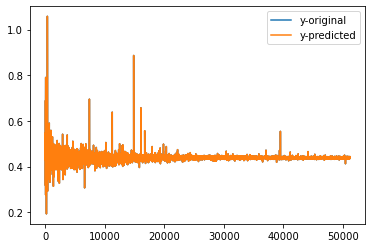

Best: -0.003521 using {'activation': 'relu', 'learning_rate': 0.001}
-0.003535 (0.000006) with: {'activation': 'relu', 'learning_rate': 0.01}
-0.003521 (0.000145) with: {'activation': 'relu', 'learning_rate': 0.001}
-0.222927 (0.219020) with: {'activation': 'sigmoid', 'learning_rate': 0.01}
-0.441915 (0.000031) with: {'activation': 'sigmoid', 'learning_rate': 0.001}


In [117]:
plt.plot(y_pred, label="y-original")
plt.plot(y_pred, label="y-predicted")
plt.legend()
plt.show()
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
